# Part One: Data Exploration

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/insurance_costs_1.csv")
data.head()

age     sex     bmi smoker     region      charges
0   19  female  27.900    yes  southwest  16884.92400
1   33    male  22.705     no  northwest  21984.47061
2   32    male  28.880     no  northwest   3866.85520
3   31  female  25.740     no  southeast   3756.62160
4   60  female  25.840     no  northwest  28923.13692

In [ ]:
from plotnine import *

Black dots represent how BMI impacts charges. Red dots represent how age impacts charges. Appears to be a slight positive correlation for bmi and relatively positive correlation for age.

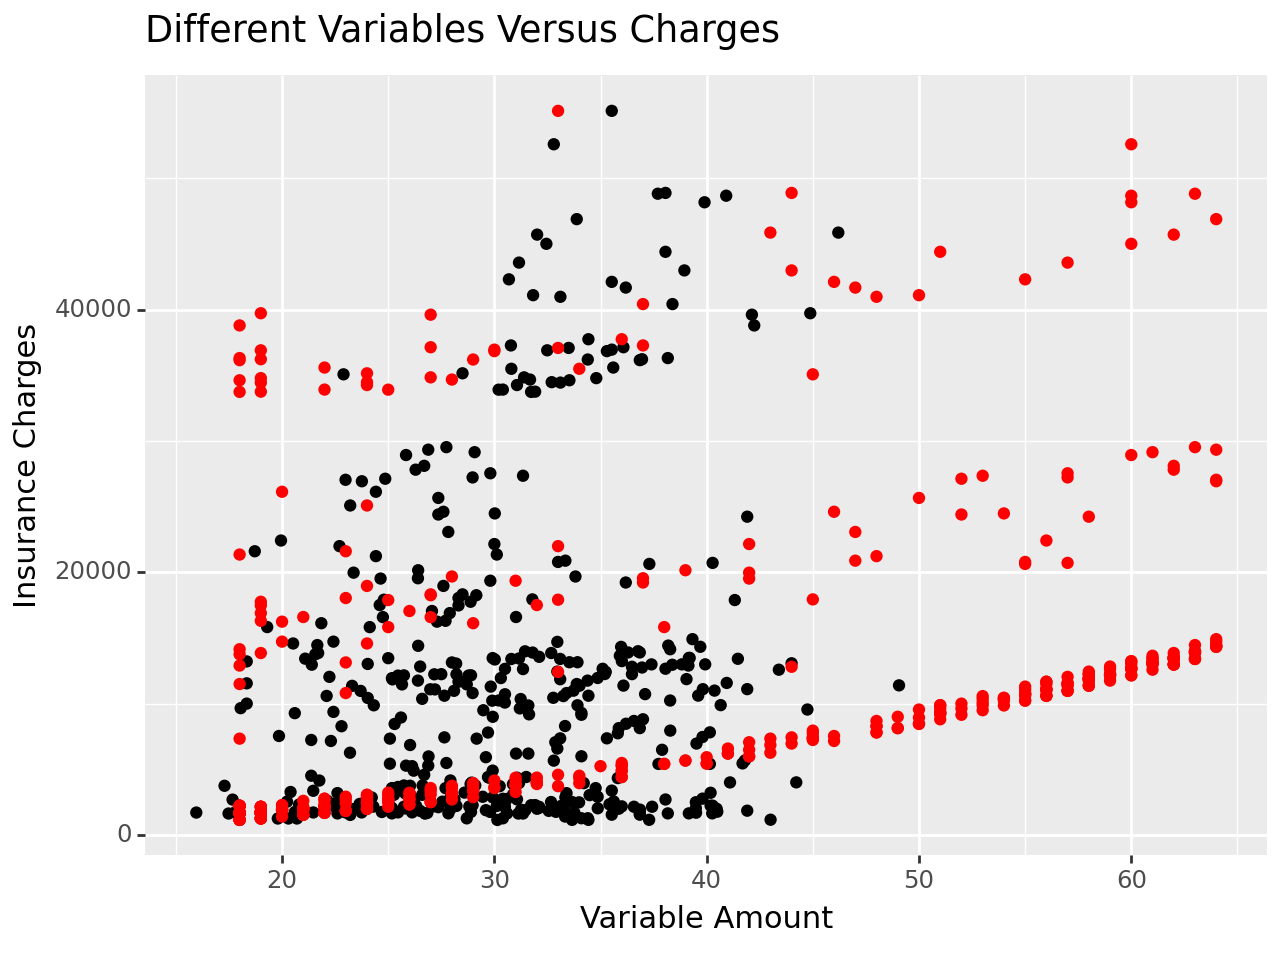

<Figure Size: (640 x 480)>

In [ ]:
plot = (ggplot()
     + geom_point(data, aes(x='bmi', y='charges'), color='black')
     + geom_point(data, aes(x='age', y='charges'), color='red')
     + labs(title='Different Variables Versus Charges', x='Variable Amount', y='Insurance Charges')
     + theme(legend_position='bottom')
)

plot

# Part Two: Simple Linear Models

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [ ]:
lr = LinearRegression()
enc = OneHotEncoder()

In [ ]:
X = data[['age']]
y = data['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
lr_fitted = lr.fit(X_train, y_train)

In [ ]:
ypreds = lr.predict(X_test)

In [ ]:
coefficients = lr_fitted.coef_
coefficients

array([211.69155768])

In [ ]:
score = r2_score(y_test, ypreds)
score

0.138708925669628

In [ ]:
mse = mean_squared_error(y_test, ypreds)
mse

121801716.15974969

Age on it's own is not a good predictor of charges as seen by the low R-squared. The coefficient suggests that every increase in age leads to a $209 increase in charges but does not appear significant.

## 2. Make a model that also incorporates the variable sex. Report your results.

In [ ]:
ct = ColumnTransformer(
    [('dummify_sex', enc, ['sex'])],
    remainder='passthrough'
)


In [ ]:
my_pipeline = Pipeline(
    [('dummify',ct), ('ols',lr)]
)


In [ ]:
X = data[['age', 'sex']]
y = data['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [ ]:
ypreds = my_pipeline.predict(X_test)

In [ ]:
score = r2_score(y_test, ypreds)
score

0.1252114734047708

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, ypreds))
rmse

11122.521901877311

R-squared is still low, even lower when only using age & sex.

## 3. Now make a model that does not include sex, but does include smoker. Report your results.

In [ ]:
X = data[['age', 'smoker']]
y = data['charges']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
ct = ColumnTransformer(
    [('dummify_s', enc, ['smoker'])],
    remainder = 'passthrough'
)


In [ ]:
my_pipeline = Pipeline(
    [('dummify',ct), ('ols',lr)]
)


In [ ]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_s', OneHotEncoder(),
                                                  ['smoker'])])),
                ('ols', LinearRegression())])

In [ ]:
ypreds= my_pipeline.predict(X_test)

In [ ]:
r2_score(y_test, ypreds)

0.8065814446672434

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, ypreds))
rmse

5229.989271910475

## 4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

The model in Q3 did much better than the model in Q2. The R-squared was much higher and had a much lower RMSE which is prefferred.

# Part Three: Multiple Linear Models

## 1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [ ]:
X = data[['age', 'bmi']]
y = data['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
lr_fitted = lr.fit(X_train, y_train)

In [ ]:
ypreds = lr_fitted.predict(X_test)

In [ ]:
score = r2_score(y_test, ypreds)
score

0.16759331519857057

In [ ]:
mse = mean_squared_error(y_test, ypreds)
mse

117716955.13097996

This r-squared is slightly better than Part 2 Q1, but not much better. The MSE is also slightly lower, buyt no much better.

## 2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [ ]:
data['age_squared'] = data['age'] ** 2

X = data[['age', 'age_squared']]
y = data['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
lr.fit(X_train, y_train)

ypreds = lr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, ypreds)
mse

121747479.23006293

In [ ]:
r_squared = lr.score(X_test, y_test)

score = r2_score(y_test, ypreds)
score

0.1390924488654508

The r-squared & MSE are very similar to that of P2 Q1.

## 3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X = data[['age']]
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr.fit(X_train_poly, y_train)

# Predict on the test set
ypreds = lr.predict(X_test_poly)

In [ ]:
mse = mean_squared_error(y_test, ypreds)
mse

119880218.40966608

In [ ]:
r_squared = lr.score(X_test_poly, y_test)
r_squared

0.15229632750329603

The results are similar to that of P2 Q1.

## 4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [ ]:
X = data[['age']]
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

poly = PolynomialFeatures(degree=12, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr.fit(X_train_poly, y_train)

ypreds = lr.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, ypreds)
r_squared = r2_score(y_test, ypreds)

mse_poly, r_squared

(122509817.49772136, 0.1337017600783279)

The results here are also comparable to that of P2 Q1.

## 5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

According to MSE and R-squared, the model in P2 Q3 is the best since it has the lowest MSE & highest R-squared. I would say the combination of these are two factors are important in real life, and it is a simpler model.

## 6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


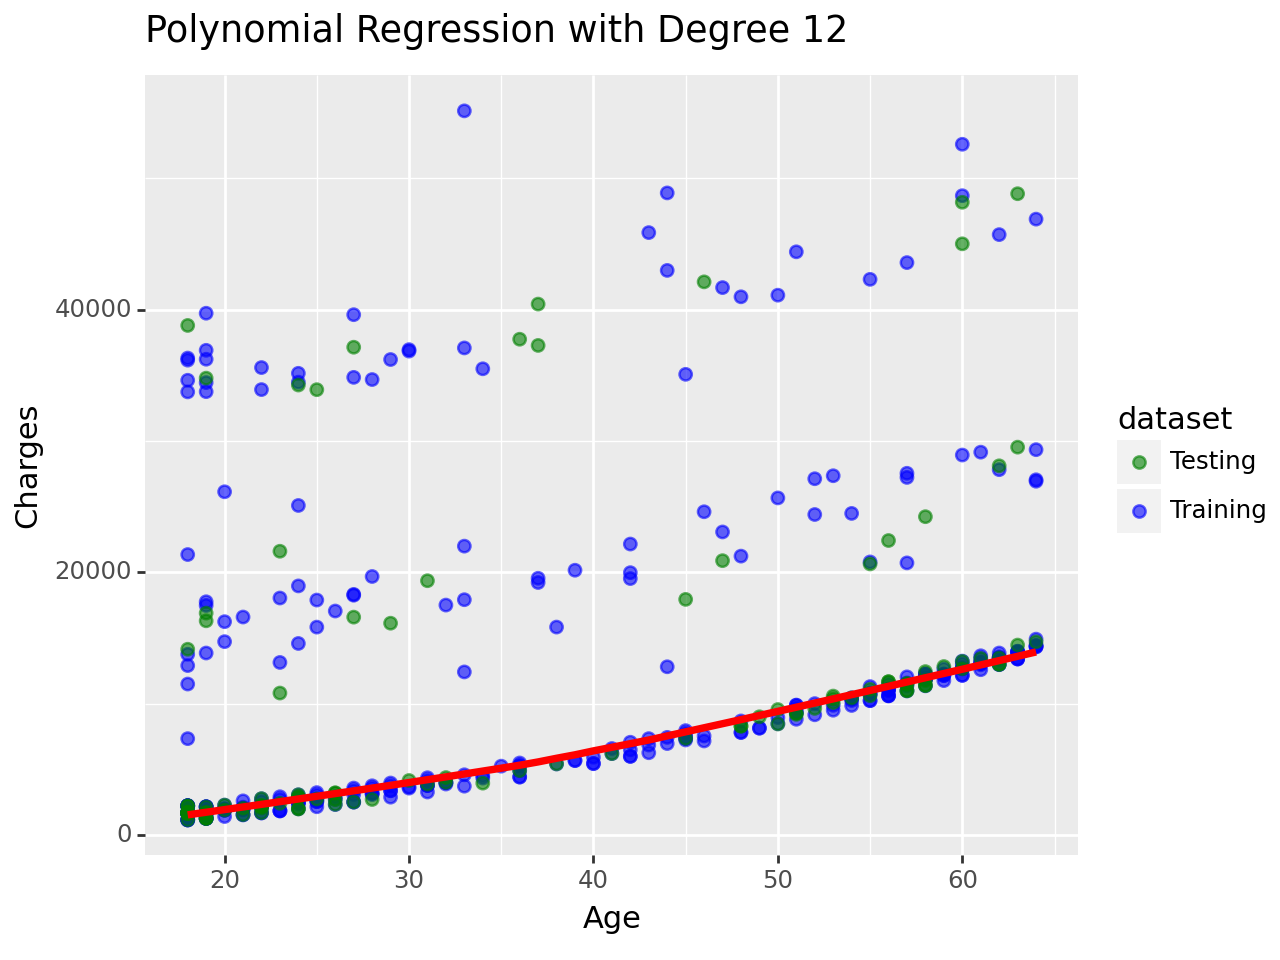

<Figure Size: (640 x 480)>

In [ ]:
combined_data = pd.concat([
    X_train.assign(charges=y_train, dataset='Training'),
    X_test.assign(charges=y_test, dataset='Testing')
])

plot = (ggplot(combined_data, aes(x='age', y='charges', color='dataset'))
     + geom_point(size=2, alpha=0.6)
     + geom_smooth(aes(x='age', y='charges'), data=data, color='red', size=1.5)
     + labs(title='Polynomial Regression with Degree 12', x='Age', y='Charges')
     + scale_color_manual(values={'Training': 'blue', 'Testing': 'green'})
    )

plot


# Part Four: New data

In [ ]:
data2 = pd.read_csv("/content/insurance_costs_2.csv")
data2.head()

age     sex     bmi smoker     region      charges
0   23    male  34.400     no  southwest   1826.84300
1   56    male  40.300     no  southwest  10602.38500
2   18    male  34.100     no  southeast   1137.01100
3   63  female  23.085     no  northeast  14451.83515
4   63    male  28.310     no  northwest  13770.09790

Only age as a predictor.

In [ ]:
X = data[['age']]
y = data['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
lr_fitted = lr.fit(X_train, y_train)

In [ ]:
X2 = data2[['age']]
ypreds = lr_fitted.predict(X2)

data2['predicted_charges'] = ypreds

In [ ]:
y = data2['charges']

r_squared = r2_score(y, ypreds)
mse = mean_squared_error(y, ypreds)

r_squared, mse

(0.1193341133571234, 136547099.2768105)

age and bmi as a predictor.

In [ ]:
X = data[['age', 'bmi']]
y = data['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
lr_fitted = lr.fit(X_train, y_train)

In [ ]:
X2 = data2[['age', 'bmi']]
ypreds = lr_fitted.predict(X2)

data2['predicted_charges'] = ypreds

In [ ]:
y = data2['charges']

r_squared = r2_score(y, ypreds)
mse = mean_squared_error(y, ypreds)

r_squared, mse

(0.14095845140104357, 133194249.25904222)

age, bmi, and smoker as predictors (no interaction terms)

In [ ]:
X = data[['age', 'bmi', 'smoker']]
y = data['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
ct = ColumnTransformer(
    [('dummify_s', enc, ['smoker'])],
    remainder = 'passthrough'
)


In [ ]:
my_pipeline = Pipeline(
    [('dummify',ct), ('ols',lr)]
)


In [ ]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_s', OneHotEncoder(),
                                                  ['smoker'])])),
                ('ols', LinearRegression())])

In [ ]:
X2 = data2[['age', 'bmi', 'smoker']]
ypreds = my_pipeline.predict(X2)

data2['predicted_charges'] = ypreds

In [ ]:
y = data2['charges']

r_squared = r2_score(y, ypreds)
mse = mean_squared_error(y, ypreds)

r_squared, mse

(0.7701858823451553, 35632640.72627119)

age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

In [ ]:
data['smoker_numeric'] = data['smoker'].map({'yes': 1, 'no': 0})
data['age_interact_smoker'] = data['age']*data['smoker_numeric']
data['bmi_interact_smoker'] = data['bmi']*data['smoker_numeric']

In [ ]:
X = data[['age', 'bmi', 'age_interact_smoker', 'bmi_interact_smoker']]
y = data['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
lr_fitted = lr.fit(X_train, y_train)

In [ ]:
data2['smoker_numeric'] = data2['smoker'].map({'yes': 1, 'no': 0})
data2['age_interact_smoker'] = data2['age']*data2['smoker_numeric']
data2['bmi_interact_smoker'] = data2['bmi']*data2['smoker_numeric']

X2 = data2[['age', 'bmi', 'age_interact_smoker', 'bmi_interact_smoker']]
ypreds = lr_fitted.predict(X2)

data2['predicted_charges'] = ypreds

In [ ]:
y = data2['charges']

r_squared = r2_score(y, ypreds)
mse = mean_squared_error(y, ypreds)

r_squared, mse

(0.8389408261189548, 24972198.127499767)

age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

In [ ]:
X = data[['age', 'bmi', 'smoker', 'age_interact_smoker', 'bmi_interact_smoker']]
y = data['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
ct = ColumnTransformer(
    [('dummify_s', enc, ['smoker'])],
    remainder = 'passthrough'
)


In [ ]:
my_pipeline = Pipeline(
    [('dummify',ct), ('ols',lr)]
)


In [ ]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_s', OneHotEncoder(),
                                                  ['smoker'])])),
                ('ols', LinearRegression())])

In [ ]:
X2 = data2[['age', 'bmi', 'smoker', 'age_interact_smoker', 'bmi_interact_smoker']]
ypreds = my_pipeline.predict(X2)

data2['predicted_charges'] = ypreds

In [ ]:
y = data2['charges']

r_squared = r2_score(y, ypreds)
mse = mean_squared_error(y, ypreds)

r_squared, mse

(0.8592265252689136, 21826903.847636063)

Based on the above MSE, the model using age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker is the winner. It also had the highest r-squared.

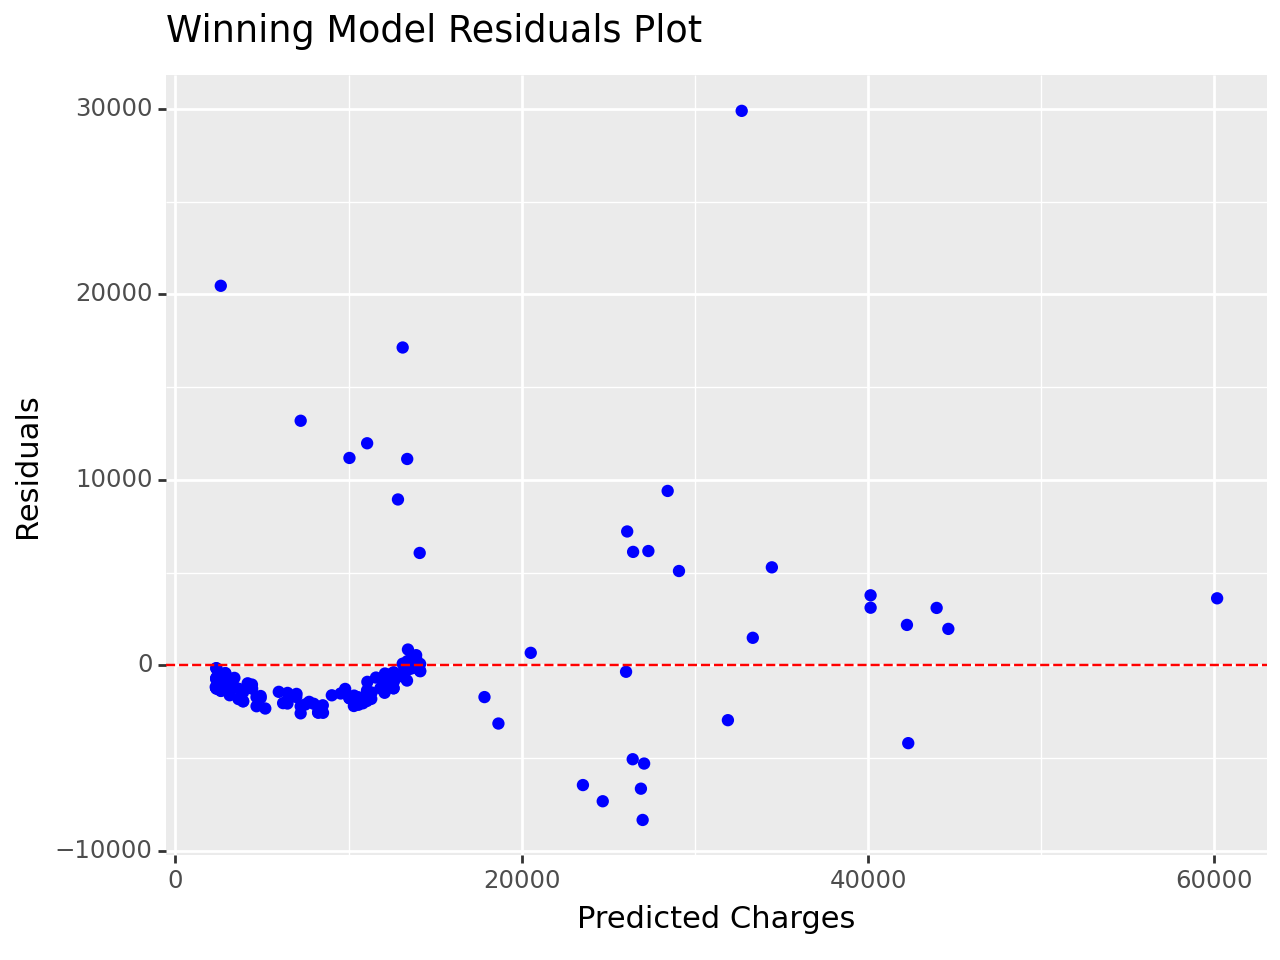

<Figure Size: (640 x 480)>

In [ ]:
data2['residuals'] = data2['charges'] - data2['predicted_charges']

plot = (
    ggplot(data2, aes(x='predicted_charges', y='residuals')) +
    geom_point(color = "blue") +
    geom_hline(yintercept=0, color="red", linetype="dashed") +  # Line at 0 for reference
    labs(x='Predicted Charges', y='Residuals', title='Winning Model Residuals Plot')
)

plot


# Part Five: Full Exploration

## After various trials and errors, I was unable to acheive a model that had a higher r-squared and lower RMSE than the model above. The model below was the closest I could get to the one above. The original split may have been representative of this new data.

In [ ]:
X = data[['age', 'bmi', 'smoker', 'age_interact_smoker', 'bmi_interact_smoker', 'sex']]
y = data['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
ct = ColumnTransformer(
    [('dummify_s', enc, ['smoker']),
     ('dummify_sex', enc, ['sex'])],
    remainder = 'passthrough'
)


In [ ]:
my_pipeline = Pipeline(
    [('dummify',ct), ('ols',lr)]
)


In [ ]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_s', OneHotEncoder(),
                                                  ['smoker']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [ ]:
X2 = data2[['age', 'bmi', 'smoker', 'age_interact_smoker', 'bmi_interact_smoker', 'sex']]
ypreds = my_pipeline.predict(X2)

data2['predicted_charges'] = ypreds

In [ ]:
y = data2['charges']

r_squared = r2_score(y, ypreds)
mse = mean_squared_error(y, ypreds)

r_squared, mse

(0.8584617154910705, 21945487.47650933)

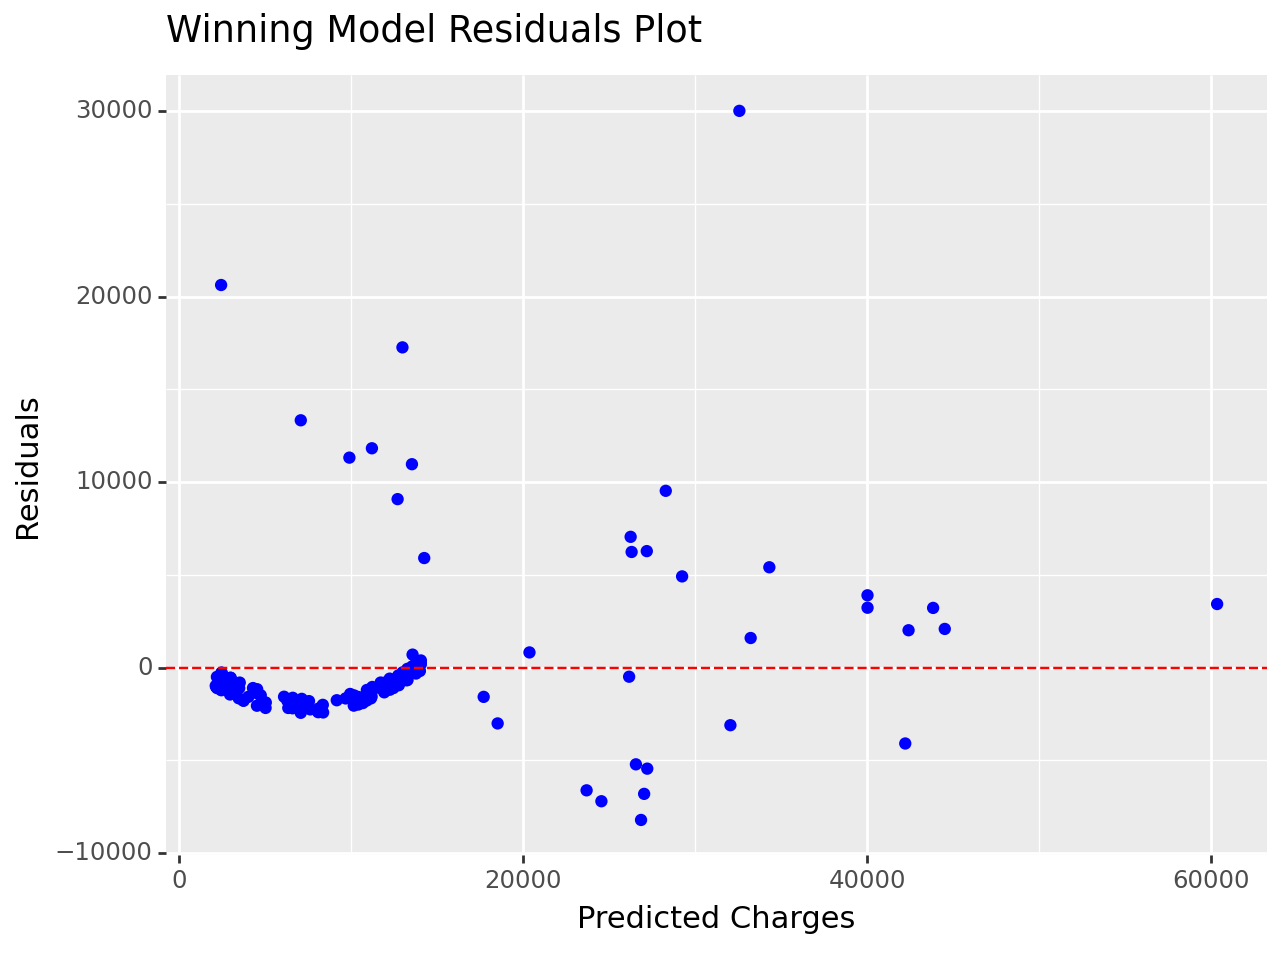

<Figure Size: (640 x 480)>

In [ ]:

plot = (
    ggplot(data2, aes(x='predicted_charges', y='residuals')) +
    geom_point(color = "blue") +
    geom_hline(yintercept=0, color="red", linetype="dashed") +  # Line at 0 for reference
    labs(x='Predicted Charges', y='Residuals', title='Winning Model Residuals Plot')
)

plot